In [29]:
from scipy.stats import beta
from scipy.special import beta as beta_func
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [4]:
def __validate(prior_shape, data_vec, cred_mass):
    if len(prior_shape) != 2:
        sys.exit('prior_shape must have two components.')
    if any([i < 0 for i in prior_shape]):
        sys.exit('prior_shape components must be positive.')
    if any([i != 0 and i != 1 for i in data_vec]):
        sys.exit('data_vec must be a vector of 1s and 0s.')
    if cred_mass <= 0 or cred_mass >= 1.0:
        sys.exit('cred_mass must be between 0 and 1.')

In [30]:
from scipy.optimize import fmin
from scipy.stats import *

def HDIofICDF(dist_name, credMass=0.95, **args):
    # freeze distribution with given arguments
    distri = dist_name(**args)
    # initial guess for HDIlowTailPr
    incredMass =  1.0 - credMass

    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)

    # find lowTailPr that minimizes intervalWidth
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    # return interval as array([low, high])
    return distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr])


In [36]:
def bern_beta(prior_shape, data_vec, cred_mass=0.95):
    """
    Function to update the bernoulli distribution with the beta prior.
    """
    __validate(prior_shape, data_vec, cred_mass)
    [a,b] = prior_shape
    z = sum(data_vec)
    N = len(data_vec)
    # Compute the posterior shape
    posterior_shape_a = a+z, 
    posterior_shape_b = b+N-z
    # Compute the evidence i.e p(D)
    p_data = beta_func(a+z, b+N-z)/beta_func(a,b)
    # Construct grid of theta values, used for graphing.
    bin_width = 0.0005  # Arbitrary small value for comb on theta.
    theta = np.arange(bin_width/2, 1-(bin_width/2)+bin_width, bin_width)
    # Compute the inital prior distribution for the given values of theta
    p_theta = beta.pdf(theta, a, b)
    # Data given theta values
    p_data_given_theta = theta**z * (1-theta)**(N-z)

    p_theta_given_data = beta.pdf(theta, posterior_shape_a, posterior_shape_b)
    
    intervals = HDIofICDF(beta, cred_mass, a=posterior_shape_a, b=posterior_shape_b)

    # Plot the results.
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(hspace=0.7)

    # Plot the prior.
    locx = 0.05
    plt.subplot(3, 1, 1)
    plt.plot(theta, p_theta)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(p_theta)*1.2)
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(\theta)$')
    plt.title('Prior')
    plt.text(locx, np.max(p_theta)/2, r'beta($\theta$;%s,%s)' % (a, b))
    # Plot the likelihood:
    plt.subplot(3, 1, 2)
    plt.plot(theta, p_data_given_theta)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(p_data_given_theta)*1.2)
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(D|\theta)$')
    plt.title('Likelihood')
    plt.text(locx, np.max(p_data_given_theta)/2, 'Data: z=%s, N=%s' % (z, N))
    # Plot the posterior:
    plt.subplot(3, 1, 3)
    plt.plot(theta, p_theta_given_data)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(p_theta_given_data)*1.2)
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(\theta|D)$')
    plt.title('Posterior')
    locy = np.linspace(0, np.max(p_theta_given_data), 5)
    plt.text(locx, locy[1], r'beta($\theta$;%s,%s)' % (posterior_shape_a, posterior_shape_b))
    plt.text(locx, locy[2], 'P(D) = %g' % p_data)
    # Plot the HDI
    plt.text(locx, locy[3],
             'Intervals = %.3f - %.3f' % (intervals[0], intervals[1]))
    plt.fill_between(theta, 0, p_theta_given_data,
                    where=np.logical_and(theta > intervals[0],
                    theta < intervals[1]),
                        color='blue', alpha=0.3)
    return intervals

array([0.10875232, 0.14668036])

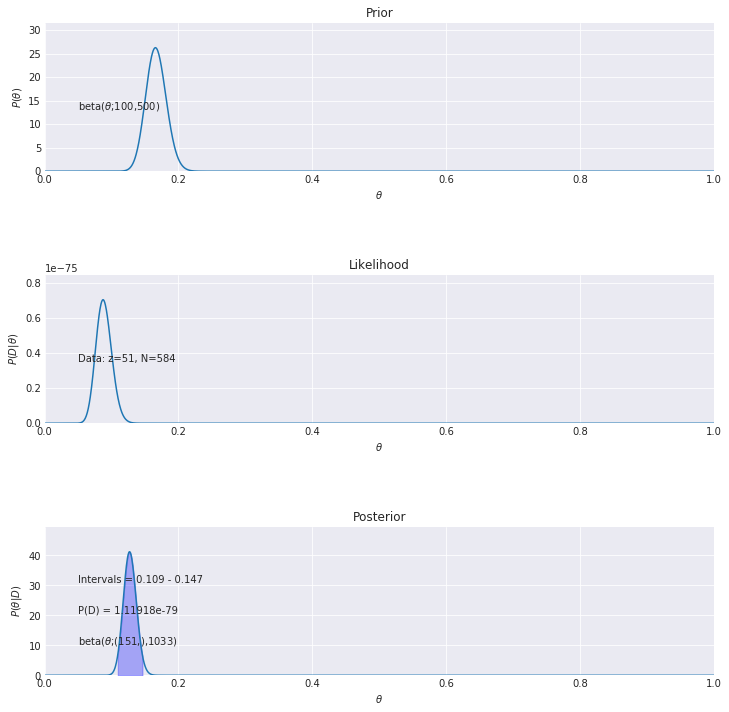

In [45]:
data_vec = np.repeat([1, 0], [51, 533])
bern_beta(prior_shape=[100, 500], data_vec=data_vec)

## Q 6.1

## Q 6.2

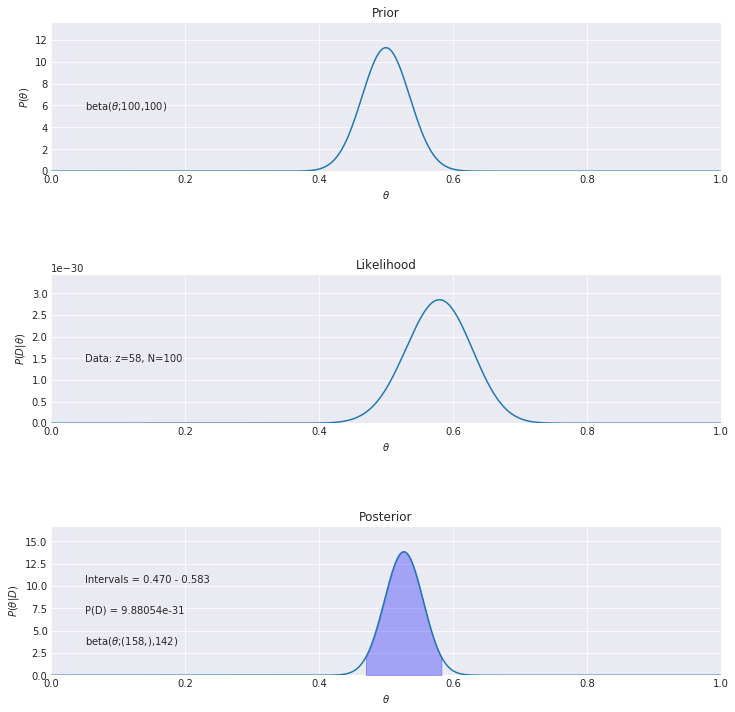

In [46]:
data_vec = np.repeat([1, 0], [58, 42])  # 58 prefer A, 42 prefer B
intervals = bern_beta(prior_shape=[100, 100], data_vec=data_vec)

The 95% HDI will be (0.45, 0.583)

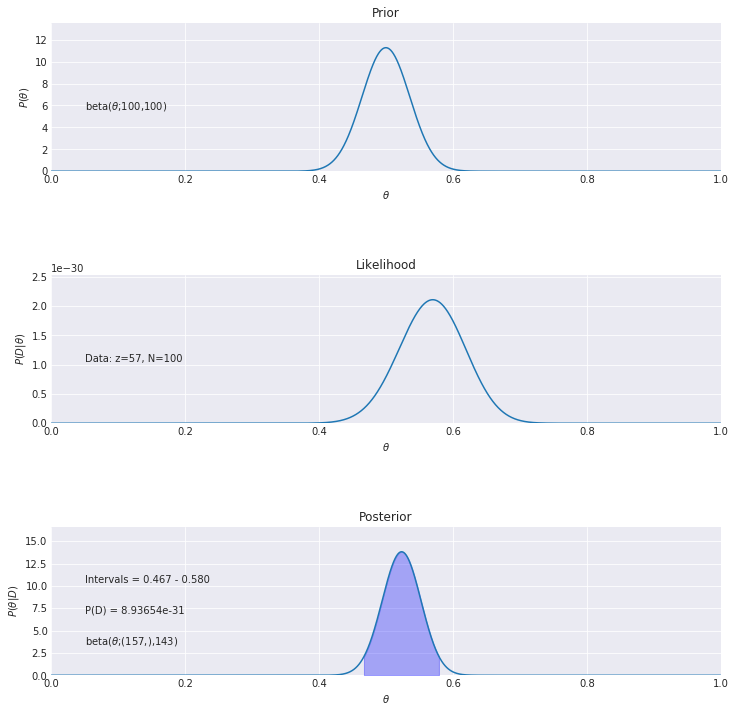

In [47]:
data_vec = np.repeat([1, 0], [57, 43])  # 57 prefer A, 43 prefer B
intervals = bern_beta(prior_shape=[100, 100], data_vec=data_vec)

The 95% HDI is (0.467, 0.580)

## Q 6.3

# Random


In [48]:
import re

In [49]:
s = "1234abcd"

In [52]:
%%timeit
re.findall(r'\d+',s)

1.04 µs ± 22.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [55]:
[int(i) for i in "abcd".split() if i.isdigit()]

IndexError: list index out of range

In [65]:
beta.cdf([0.5, 0.5], 15, 40)

array([0.99973228, 0.99973228])